In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

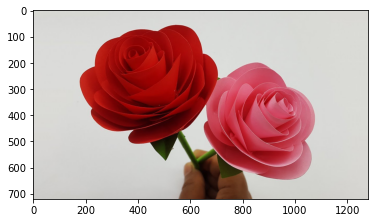

In [4]:
img = plt.imread('rose.jpg')
plt.imshow(img)

In [5]:
src_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
fftImg = np.fft.fft2(src_img)
centerImg = np.fft.fftshift(fftImg)
fftImgLog =  100 * np.log(abs(fftImg))
centerImgLog = 100 * np.log(abs(centerImg))

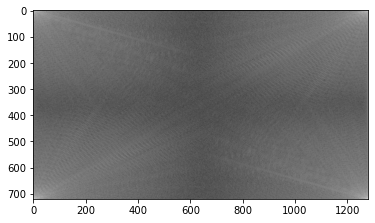

In [6]:
plt.imshow(fftImgLog,cmap='gray')

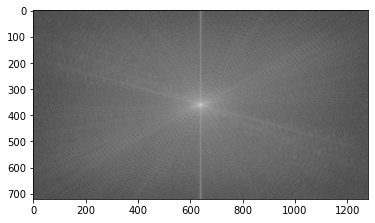

In [7]:
plt.imshow(centerImgLog,cmap='gray')

In [8]:
r,c = centerImgLog.shape
ox,oy = r//2,c//2

In [9]:
def show_transformation(gray,kernel,filtered,img_name):
    plt.figure(figsize=(30,20))
    def plot_it(img,title,ind):
        plt.subplot(1,3,ind)
        plt.imshow(img,cmap='gray')
        plt.title(title)
        
    plot_it(gray,'gray',1)
    plot_it(kernel,'kernel',2)
    plot_it(filtered,'After filter',3)
    plt.savefig(img_name,bbox_inches='tight')
    plt.show()
    

In [10]:
?cv2.rectangle

Docstring:
rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a simple, thick, or filled up-right rectangle.
.   
.   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
.   are pt1 and pt2.
.   
.   @param img Image.
.   @param pt1 Vertex of the rectangle.
.   @param pt2 Vertex of the rectangle opposite to pt1 .
.   @param color Rectangle color or brightness (grayscale image).
.   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
.   mean that the function has to draw a filled rectangle.
.   @param lineType Type of the line. See #LineTypes
.   @param shift Number of fractional bits in the point coordinates.



rectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img
.   @overload
.   
.   use `rec` parameter as alternative specification of the drawn rectangle: `r.tl() and
.   r.br()-Point(1,1)` are opposite corners
Type:      builtin_function

In [11]:
filter1 = np.zeros((r,c),np.uint8)
filter1= cv2.rectangle(filter1,(oy-50,ox-50),(oy+50,ox+50),(255,255,255),-1)
filter1fft = np.fft.fft2(filter1)
centerdfilter = np.fft.fftshift(filter1fft)
filterfft = 100 * np.log(np.abs(centerdfilter))

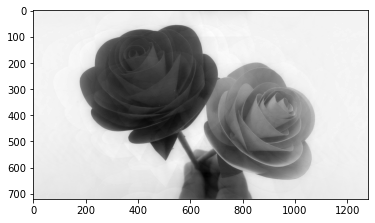

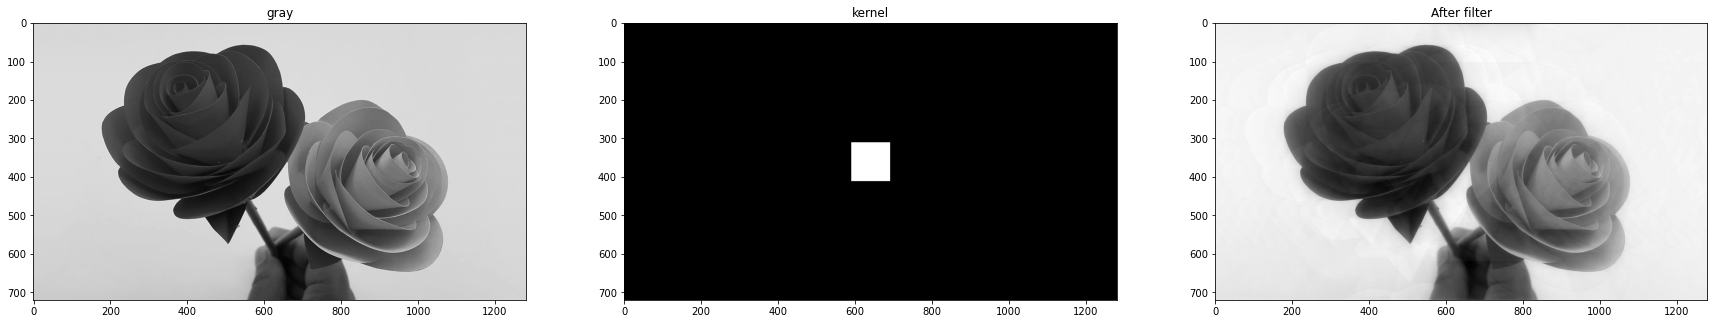

In [12]:

imageBack1 = centerImg * filterfft
filterImg1 = np.abs(np.fft.ifft2(imageBack1))
plt.imshow(filterImg1,cmap='gray')

show_transformation(src_img,filter1,filterImg1,'kernel1_transform.jpg')

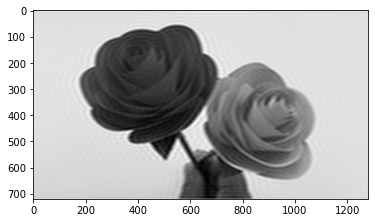

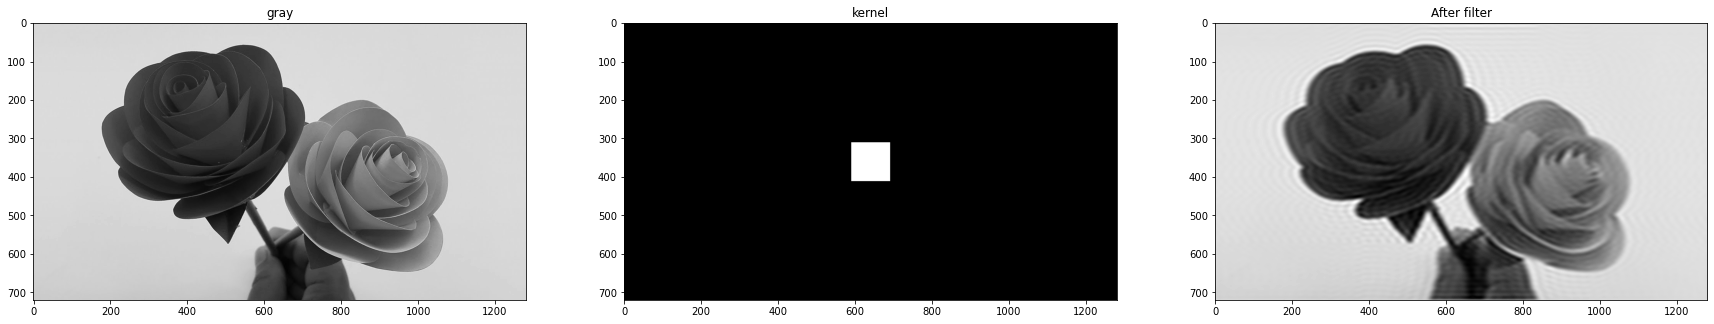

In [13]:
filter1 = np.zeros((r,c),np.uint8)
filter1= cv2.rectangle(filter1,(oy-50,ox-50),(oy+50,ox+50),(255,255,255),-1)
imageBack1 = centerImg * filter1
filterImg1 = np.abs(np.fft.ifft2(imageBack1))
plt.imshow(filterImg1,cmap='gray')

show_transformation(src_img,filter1,filterImg1,'kernel1_transform.jpg')

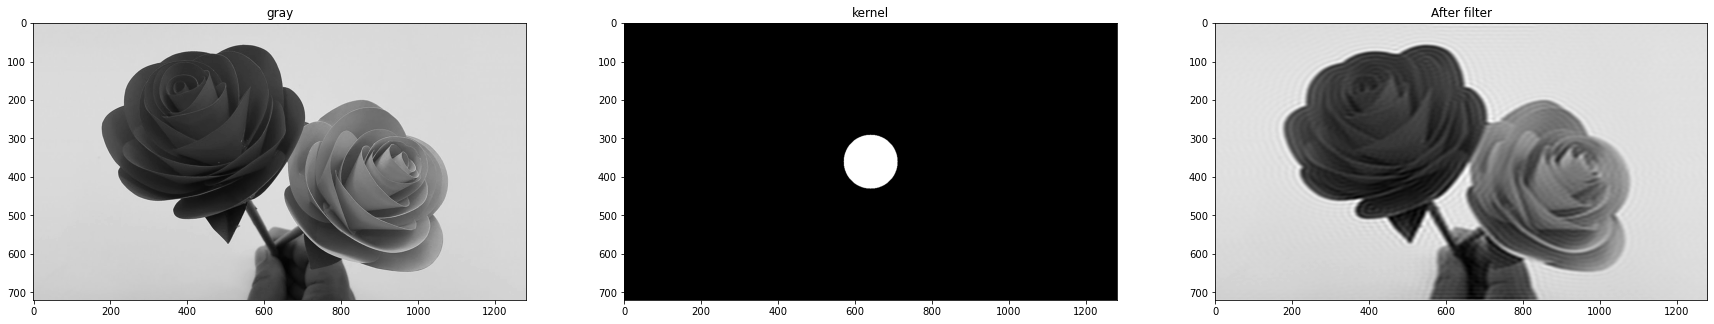

In [14]:
filter2 = np.zeros((r,c),np.uint8)
filter2 = cv2.circle(filter2,(oy,ox),70,(255,255,255),-1)
imageBack2 = centerImg * filter2
filterImg2 = np.abs(np.fft.ifft2(imageBack2))
show_transformation(src_img,filter2,filterImg2,'kernel2_transform.jpg')

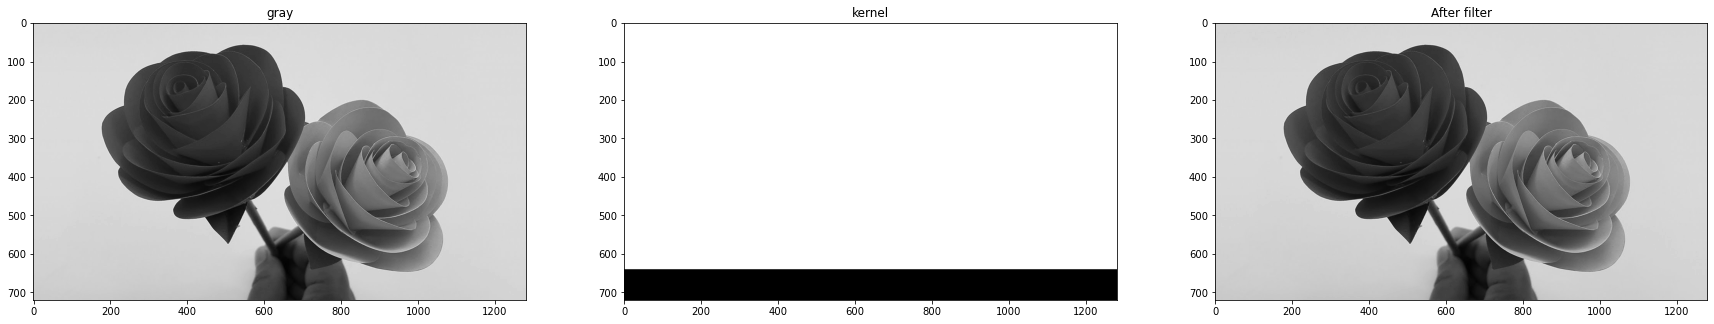

In [15]:
filter3 = np.zeros((r,c),np.uint8)
filter3[:oy,:] = 1
imageBack3 = centerImg * filter3
filterImg3 = np.abs(np.fft.ifft2(imageBack3))

show_transformation(src_img,filter3,filterImg3,'kernel3_transform.jpg')

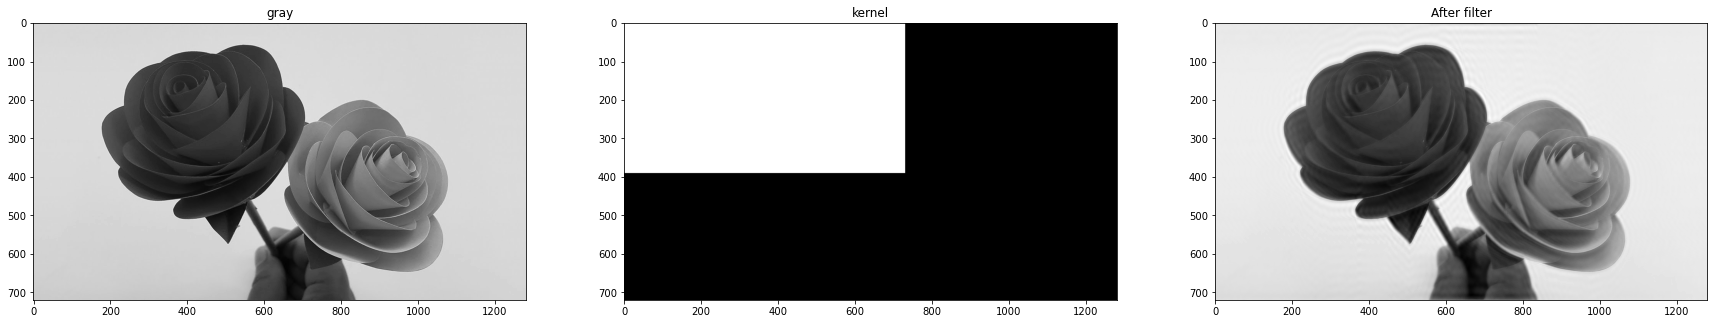

In [16]:
filter4 = np.zeros((r,c),np.uint8)
filter4[:ox+30,:oy+90] = 1
imageBack4 = centerImg * filter4
filterImg4 = np.abs(np.fft.ifft2(imageBack4))
show_transformation(src_img,filter4,filterImg4,'kernel4_transform.jpg')

In [17]:
img_set = [src_img,fftImgLog,centerImgLog,filter1,filterImg1,filter2,filterImg2,
                filter3,filterImg3,filter4,filterImg4]
title_set = ['Source Image','FFT Image Log','Center Image Log',
                    'Filter1','Filter1 Image','Filter2','FilterImage2',
                        'Filter3','FilterImg3','Filter4','FilterImg4']


In [18]:
def plot_img(img_set , title_set):
    n = len(img_set)
    r,c = (4,3)
    plt.figure(figsize=(20,20))
    for i in range(n):
        plt.subplot(r,c,i+1)
        plt.imshow(img_set[i],cmap='gray')
        plt.title(title_set[i])

    plt.savefig('OutputFFT.png')
    plt.show()

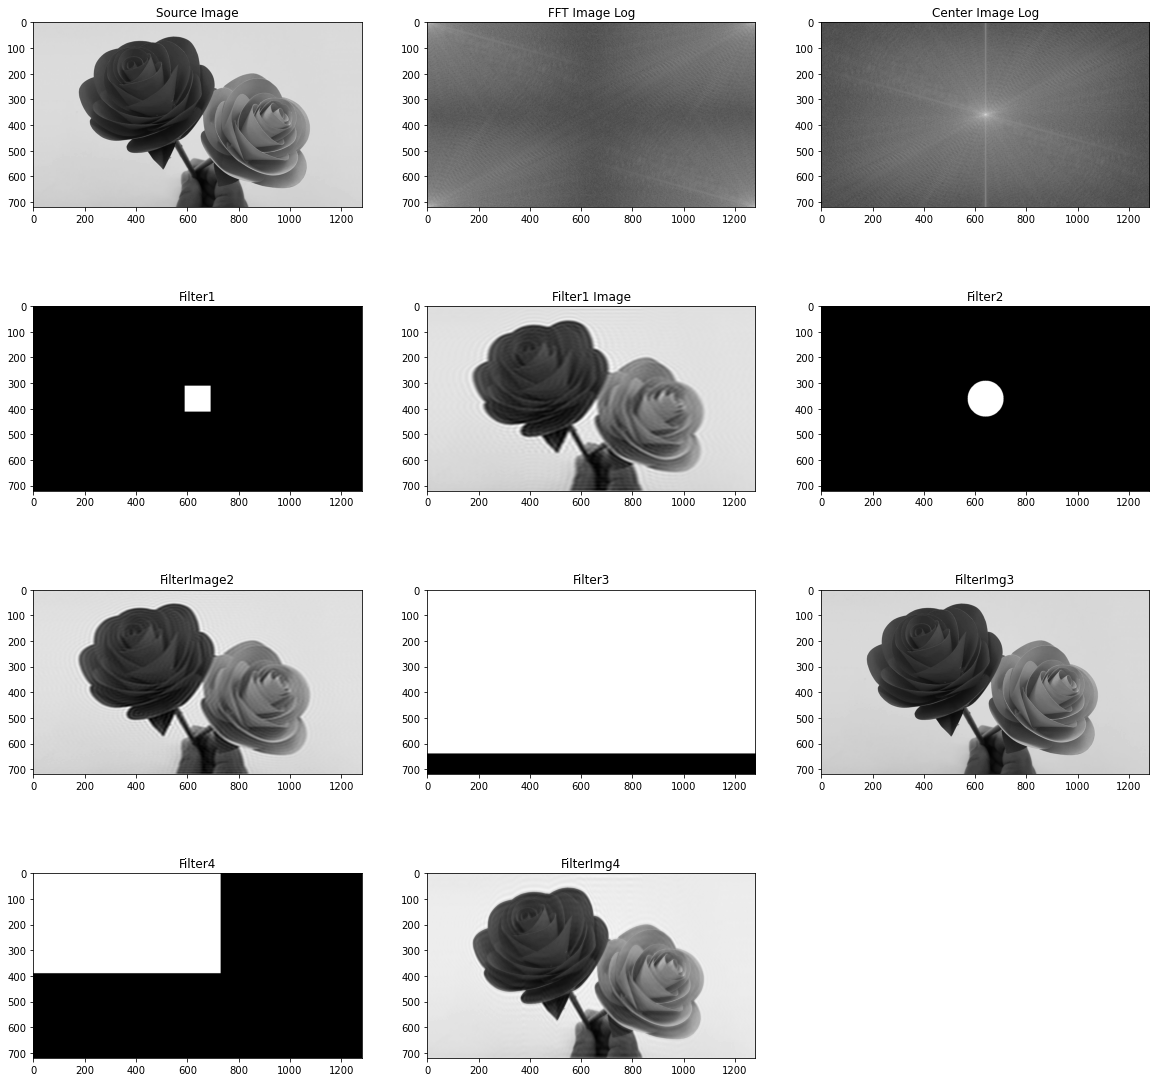

In [19]:
plot_img(img_set,title_set)